# Real-world Data Wrangling

In [67]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable


In [68]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached certifi-2025.7.14-py3-none-any.whl (162 kB)
  Using cached pandas-2.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)


**Note:** Restart the kernel to use updated package(s).

In [69]:
!pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable


## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
Incidents involving police shootings have raised serious concerns about potential racial disparities in law enforcement across the United States. This project focuses on gathering and analyzing data related to these incidents to explore two key aspects: identifying the city with the highest frequency of police shootings and understanding the racial composition of those affected.
The intention is not only to highlight geographic trends but also to assess whether certain racial groups are disproportionately impacted. Through systematic data preprocessing and analysis, this study aims to uncover patterns that may indicate the presence—or absence—of racial bias in police-related shootings.

### **1.2.** Gather at least two datasets using two different data gathering methods

For this analysis, I will utilize two datasets obtained using separate data collection techniques. The first dataset, which provides demographic details for cities across the United States—including the racial breakdown and percentages for each group—will be acquired manually via a download from Kaggle.
In contrast, the second dataset will be gathered programmatically using a data retrieval script. This dataset focuses on police shooting incidents and includes detailed information such as the victim's name, date of the event, race, and other relevant attributes. These two sources together will support a comprehensive exploration of potential racial disparities in police shootings by providing both demographic context and incident-specific data.

In [70]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt

In [ ]:
### I Downloaded The First Dataset Manuallay.

In [71]:
city_race_csv = pd.read_csv('ShareRaceByCity.csv')

In [72]:
city_race_csv.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [ ]:
### I selected this dataset because it provides detailed demographic data for each U.S. city, including the racial composition expressed as percentages. This information is crucial for addressing the research question, as it allows us to compare shooting incidents relative to the racial makeup of each location. Additionally, the dataset includes geographic information for each city, which adds valuable context for spatial analysis.

In [ ]:
### I Downloaded the sec Dataset programmatically

In [73]:
path = kagglehub.dataset_download("kwullum/fatal-police-shootings-in-the-us")
print(path)

/home/student/.cache/kagglehub/datasets/kwullum/fatal-police-shootings-in-the-us/versions/1


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [74]:
ploice_killing_csv = pd.read_csv(path + "/PoliceKillingsUS.csv", encoding='latin1')

In [75]:
ploice_killing_csv.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
### This dataset was selected for its comprehensive coverage of police shooting incidents across the country. It includes critical details such as the race of each individual involved and the city where the incident took place. These variables are essential for analyzing patterns and drawing meaningful conclusions related to our research question, making the dataset a vital component of the study.

## 2. Assess data



### Quality Issue 1:

In [76]:
duplicate_city_entries = city_race_csv[city_race_csv.duplicated(subset='City', keep=False)]
duplicate_city_entries.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
6,AL,Albertville city,75.9,1.9,0.8,0.5,27.9
21,AL,Ashland town,71.5,24.1,0.3,0.7,5.7


In [11]:
city_race_csv.City.duplicated().sum()

5049

 In the first dataset as we can see, we have 5049  duplicated cities, so we need to drop these rows.

### Quality Issue 2:

In [77]:
ploice_killing_csv.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [78]:
ploice_killing_csv.name.duplicated().sum()

54

The second dataset presents a notable data quality challenge due to many repeated names. Although it’s possible for multiple individuals to share the same name, this dataset centers specifically on people killed by police officers. Since the total number of cases is relatively small—only 54—it's highly unlikely that different victims with identical names were involved. Therefore, these repeated entries are most likely duplicates rather than distinct individuals, and this duplication issue needs to be carefully resolved during data cleaning.

### Tidiness Issue 1:

In [79]:
city_race_csv.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [ ]:
#FILL IN - Inspecting the dataframe programmatically

The first dataset suffers from a tidiness problem because some column headers are incorrectly used as variable values. According to tidy data principles, each variable should occupy its own column. To fix this, we will reshape the dataset by consolidating those column headers into a single variable column and correctly aligning their corresponding values.

### Tidiness Issue 2: 

In [80]:
ploice_killing_csv.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
### The name is not atomic and need to be split into two column, one for the first name and another for the last name.

 We can see here that the date column is not atomic.

### Tidiness Issue 3: 

In [81]:
ploice_killing_csv.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
### ### The third tidiness issue in the dataset is that the date column is not atomic—it combines day, month, and year into a single field. To follow tidy data principles, we need to split this column into three separate columns: day, month, and year. 

## 3. Clean data


In [82]:
city_data = city_race_csv.copy()
police_data = ploice_killing_csv.copy()

### Quality Issue 1: Removing the duplicated city names

In [83]:
city_data.drop_duplicates(subset='City', inplace=True)

In [84]:
city_data.City.duplicated().sum()

0

### As we can see here, we fixed the first quality issue and removed all duplicated city names.

### **Quality Issue 2:  Removing the duplicated names of the people killed by the police.

In [85]:
police_data.drop_duplicates(subset='name', inplace=True)

In [86]:
police_data.name.duplicated().sum()

0

### We can clearly see now that we don't have duplicated names anymore.

### **Tidiness Issue 1: Now we are going to change the columns into variables used in rows under only one column**

In [92]:
df_melted_city = pd.melt(city_data, id_vars=['Geographic area', 'City'], var_name='Race', value_name='Percentage')


In [93]:
df_melted_city.head()

,Geographic area,City,Race,Percentage
0,AL,Abanda CDP,share_white,67.2
1,AL,Abbeville city,share_white,54.4
2,AL,Adamsville city,share_white,52.3
3,AL,Addison town,share_white,99.1
4,AL,Akron town,share_white,13.2


In [90]:
df_melted_city['Race'] = df_melted_city['Race'].str.slice(start=6)

In [94]:
df_melted_city.head()

,Geographic area,City,Race,Percentage
0,AL,Abanda CDP,share_white,67.2
1,AL,Abbeville city,share_white,54.4
2,AL,Adamsville city,share_white,52.3
3,AL,Addison town,share_white,99.1
4,AL,Akron town,share_white,13.2


The dataset is now cleaner, and I updated the column labels by replacing "share_race" with the actual race names, which makes the column headings clearer and more intuitive.

### Tidiness Issue 2:  The 'name' column should be split into separate 'first name' and 'last name' columns to ensure each field contains a single, atomic piece of information.

In [95]:
police_data['name'] = police_data['name'].astype(str)
police_data['FirstName'] = police_data['name'].str.split(' ').str[0]
police_data['LastName'] = police_data['name'].str.split(' ').str[1:].str.join(' ')
police_data.drop(columns=['name'], inplace=True)

cols_order = ['id', 'FirstName', 'LastName'] + [col for col in police_data.columns if col not in ['id', 'FirstName', 'LastName']]
police_data = police_data[cols_order]

police_data.head()


,id,FirstName,LastName,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim,Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis,Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John,Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew,Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael,Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


This tidiness issue was resolved by splitting the original name column into two separate columns: one for first names and another for last names.

### Tidiness Issue. 3: Making the date column atomic.

In [ ]:
### The date column should be separated into three distinct columns: day, month, and year, to ensure each contains a single piece of information.

In [96]:
police_data[['Month_Of_Death', 'Day_Of_Death', 'Year_Of_Death']] = police_data['date'].str.split('/', expand=True)

police_data['Month_Of_Death'] = police_data['Month_Of_Death'].astype(int)
police_data['Day_Of_Death'] = police_data['Day_Of_Death'].astype(int)
police_data['Year_Of_Death'] = police_data['Year_Of_Death'].astype(int)

police_data.drop(columns=['date'], inplace=True)

cols_order = ['id', 'FirstName', 'LastName', 'Month_Of_Death', 'Day_Of_Death', 'Year_Of_Death'] + \
             [col for col in police_data.columns if col not in ['id', 'FirstName', 'LastName', 'Month_Of_Death', 'Day_Of_Death', 'Year_Of_Death']]

police_data = police_data[cols_order]

police_data.head()

,id,FirstName,LastName,Month_Of_Death,Day_Of_Death,Year_Of_Death,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim,Elliot,2,1,15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis,Lee Lembke,2,1,15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John,Paul Quintero,3,1,15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew,Hoffman,4,1,15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael,Rodriguez,4,1,15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
### As shown, the original date column has been successfully split into three separate atomic columns.

In [ ]:
### With the data quality and tidiness issues resolved, our datasets are now prepared for the next phase of analysis.

In [ ]:
### Next, I will remove unnecessary columns from each dataset to prepare them for merging into a single dataframe.

In [97]:
race_mapping = {
    'W': 'White',
    'B': 'Black',
    'H': 'Hispanic',
    'A': 'Asian',
    'N': 'Native American',
    'O': 'Other'
}

police_data['Race_Of_Deceased'] = police_data['race'].map(race_mapping)


In [98]:
police_data['Race_Of_Deceased'] = police_data['Race_Of_Deceased'].str.strip().str.title()
df_melted_city['Race'] = df_melted_city['Race'].str.strip().str.title()


In [99]:
police_data['city'] = police_data['city'].str.strip().str.lower()
df_melted_city['City'] = df_melted_city['City'].str.strip().str.lower()


In [100]:
police_data.drop(columns=['id', 'flee', 'body_camera', 'threat_level', 'signs_of_mental_illness', 'age', 'gender', 'armed', 'state', 'race'], inplace=True)
df_melted_city.drop(columns=['Geographic area'], inplace=True)


In [101]:
police_data.head()


,FirstName,LastName,Month_Of_Death,Day_Of_Death,Year_Of_Death,manner_of_death,city,Race_Of_Deceased
0,Tim,Elliot,2,1,15,shot,shelton,Asian
1,Lewis,Lee Lembke,2,1,15,shot,aloha,White
2,John,Paul Quintero,3,1,15,shot and Tasered,wichita,Hispanic
3,Matthew,Hoffman,4,1,15,shot,san francisco,White
4,Michael,Rodriguez,4,1,15,shot,evans,Hispanic


In [102]:
df_melted_city.head()


,City,Race,Percentage
0,abanda cdp,Share_White,67.2
1,abbeville city,Share_White,54.4
2,adamsville city,Share_White,52.3
3,addison town,Share_White,99.1
4,akron town,Share_White,13.2


### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [103]:
df_combined = pd.merge(police_data, df_melted_city, left_on=['city', 'Race_Of_Deceased'], right_on=['City', 'Race'], how='left')
df_combined.drop(columns=['City', 'Race'], inplace=True)
df_combined.head()


,FirstName,LastName,Month_Of_Death,Day_Of_Death,Year_Of_Death,manner_of_death,city,Race_Of_Deceased,Percentage
0,Tim,Elliot,2,1,15,shot,shelton,Asian,NaN
1,Lewis,Lee Lembke,2,1,15,shot,aloha,White,NaN
2,John,Paul Quintero,3,1,15,shot and Tasered,wichita,Hispanic,NaN
3,Matthew,Hoffman,4,1,15,shot,san francisco,White,NaN
4,Michael,Rodriguez,4,1,15,shot,evans,Hispanic,NaN


In [104]:
df_combined.isna().sum()

FirstName              0
LastName               0
Month_Of_Death         0
Day_Of_Death           0
Year_Of_Death          0
manner_of_death        0
city                   0
Race_Of_Deceased     151
Percentage          2481
dtype: int64

In [36]:
### Here, the 'Percentage' column contains only NaN values, likely caused by mismatched city names across the datasets. Since this data isn’t useful, I’ll remove the column.


In [105]:
df_combined.drop(columns=['Percentage'], inplace=True)


In [106]:
df_combined.head()

,FirstName,LastName,Month_Of_Death,Day_Of_Death,Year_Of_Death,manner_of_death,city,Race_Of_Deceased
0,Tim,Elliot,2,1,15,shot,shelton,Asian
1,Lewis,Lee Lembke,2,1,15,shot,aloha,White
2,John,Paul Quintero,3,1,15,shot and Tasered,wichita,Hispanic
3,Matthew,Hoffman,4,1,15,shot,san francisco,White
4,Michael,Rodriguez,4,1,15,shot,evans,Hispanic


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [107]:
city_data.to_csv('raw_city_race_data.csv', index=False)
ploice_killing_csv.to_csv('raw_police_killings_data.csv', index=False)
police_data.to_csv('cleaned_police_data.csv', index=False)
df_melted_city.to_csv('cleaned_city_race_data.csv', index=False)
df_combined.to_csv('combined_data.csv', index=False)


## 5. Answer the research question

### **5.1:**Which city experiences the highest number of police shootings, and what is the racial breakdown of those incidents?

In [108]:
city_shooting_counts = df_combined['city'].value_counts().reset_index()
city_shooting_counts.columns = ['city', 'total_shootings']

top_cities = city_shooting_counts.head()['city']

top_city_data = df_combined[df_combined['city'].isin(top_cities)]

race_counts = top_city_data.groupby(['city', 'Race_Of_Deceased']).size().reset_index(name='count')

most_engaged_race_per_city = race_counts.sort_values(['city', 'count'], ascending=[True, False]).drop_duplicates('city')

summary = pd.merge(most_engaged_race_per_city, city_shooting_counts, on='city')

summary = summary[['city', 'total_shootings', 'Race_Of_Deceased', 'count']]
summary.columns = ['City', 'Total Shootings', 'Most Involved Race', 'Race Shooting Count']

summary.head()


,City,Total Shootings,Most Involved Race,Race Shooting Count
0,chicago,25,Black,21
1,houston,26,Black,15
2,los angeles,37,Hispanic,18
3,phoenix,29,White,12
4,san antonio,19,Hispanic,12


The table above shows that Chicago had the highest number of race-involved shootings, with 21 out of 25 victims belonging to the same racial group.

In [ ]:
### For the first visualization, I will highlight Los Angeles—the city with the highest number of shootings as indicated in the table—and display the racial breakdown of those incidents.

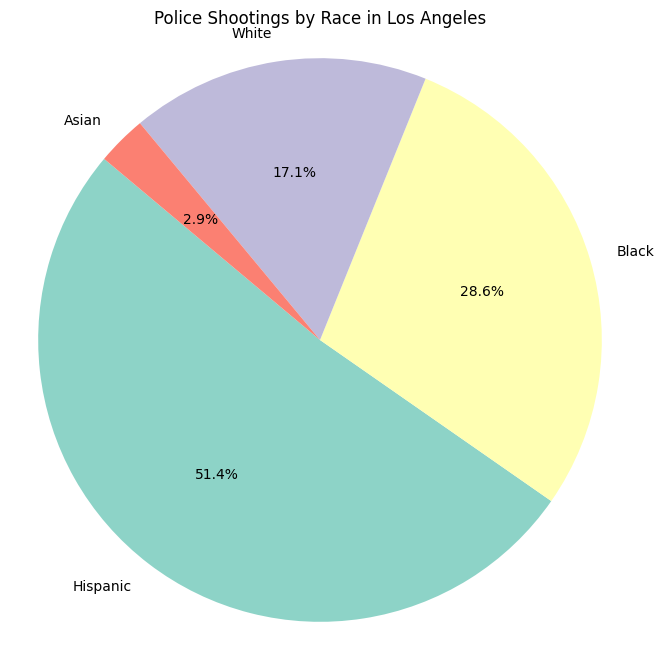

In [109]:
import matplotlib.pyplot as plt

la_data = df_combined[df_combined['city'].str.lower() == 'los angeles']
race_counts_la = la_data['Race_Of_Deceased'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    race_counts_la,
    labels=race_counts_la.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors  # changed color palette here
)
plt.title('Police Shootings by Race in Los Angeles')
plt.axis('equal')
plt.show()


In [ ]:
### The data from Los Angeles reveals that nearly 50% of those shot were Hispanic. In my view, this likely reflects the city's demographics rather than racial bias, suggesting officers are simply carrying out their duties.


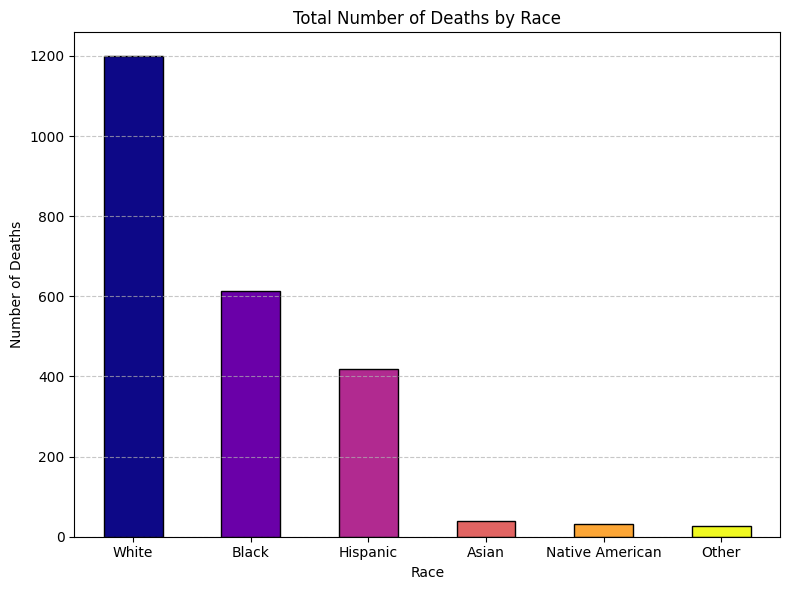

In [110]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

race_counts = police_data['Race_Of_Deceased'].value_counts()

colors = cm.plasma(np.linspace(0, 1, len(race_counts)))

plt.figure(figsize=(8, 6))
race_counts.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Total Number of Deaths by Race')
plt.xlabel('Race')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


The second visualization highlights that White individuals represent the largest number of police shooting victims, with fatalities exceeding 1,000 cases.


### **5.2:**Do cities with a higher percentage of Black residents experience more police killings per capita?

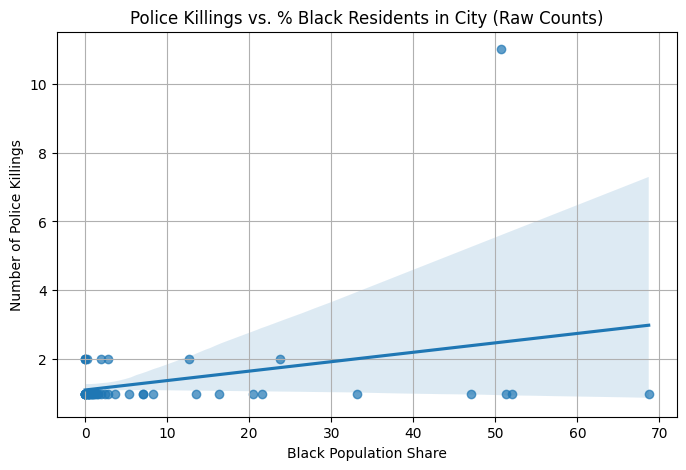

Correlation between % Black residents and police killings: 0.32


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 0: Normalize city names to lowercase and strip spaces
ploice_killing_csv['city'] = ploice_killing_csv['city'].str.strip().str.lower()
city_race_csv['City'] = city_race_csv['City'].str.strip().str.lower()

# Step 1: Count police killings per city
killings_per_city = ploice_killing_csv.groupby('city').size().reset_index(name='Killings')

# Step 2: Merge with city demographics on normalized city names
killings_per_city = killings_per_city.merge(
    city_race_csv[['City', 'share_black']],
    left_on='city',
    right_on='City',
    how='inner'
)

# Convert 'share_black' to numeric, coercing errors to NaN
killings_per_city['share_black'] = pd.to_numeric(killings_per_city['share_black'], errors='coerce')

# Drop rows where share_black is NaN (non-convertible)
killings_per_city = killings_per_city.dropna(subset=['share_black'])

# Step 3: Plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(data=killings_per_city, x='share_black', y='Killings', scatter_kws={'alpha':0.7})
plt.title('Police Killings vs. % Black Residents in City (Raw Counts)')
plt.xlabel('Black Population Share')
plt.ylabel('Number of Police Killings')
plt.grid(True)
plt.show()

# Step 4: Calculate and print correlation coefficient
correlation = killings_per_city['share_black'].corr(killings_per_city['Killings'])
print(f"Correlation between % Black residents and police killings: {correlation:.2f}")


### **5.2:** Reflection


Throughout this project, I gained valuable insights and discovered that I’m capable of overcoming challenges beyond my expectations. I faced several obstacles along the way, including handling invalid inputs, identifying outliers, and dealing with inconsistent data formats. For instance, I initially planned to analyze the Percentage column but had to exclude it due to a high volume of missing data.
Given more time, I would focus more on thorough data cleaning and attempt to recover or estimate missing values like those in the Percentage column. Overall, this project has significantly enhanced my abilities in data cleaning, analysis, and integrating diverse datasets effectively.